<a href="https://colab.research.google.com/github/szymbor2/ATMS-597-Project-4-Group-C/blob/master/project4_0325_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

<b>Import Libraries</b>

In [0]:
import tarfile
import pandas as pd
import os

In [0]:
# Import Libraries for section "Linear regression model"
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b>Set Your Directory</b>

In [0]:
YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/ATMS597/project4/' #Sarah
# YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/ATMS 597/P04/' #Cathy
# YOUR_DIRECTORY = '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 4/Project 4/' #Chu-Chun

### <b>Import</b> GFS data - Daily

In [6]:
daily = tarfile.open(name = YOUR_DIRECTORY + 'daily.tar.gz') # Set the archive for opening

# Aggregate to PD DataFrame
cur_file = daily.next() # Initiate while loop using the first file in the tar archive
daily_gfs = pd.DataFrame(columns=['TMAX', 'TMIN', 'WMAX', 'RTOT'])
i = 0
while cur_file != None:
    i += 1
    if i % 350 == 0:
        print(float(i/3500))
    working_file = YOUR_DIRECTORY + cur_file.name
    daily.extract(cur_file, path=YOUR_DIRECTORY) # Extract TarInfo Object
    convert_to_df = pd.read_csv(working_file, index_col=0, parse_dates=True, 
                                infer_datetime_format=True) # Convert cur_file 
                                # (TarInfo Object) to string, then to PD; convert
                                # index col to DateTime
    daily_gfs = daily_gfs.append(convert_to_df) # Append PD to DF
    os.remove(working_file) # Remove file extracted in directory
    cur_file = daily.next() # Go to next file in archive

daily.close() # Close .tar

daily_gfs

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


,TMAX,TMIN,WMAX,RTOT
2010-01-01 12:00:00,-11.26,-16.46,7.323933,0.05
2010-01-02 12:00:00,-10.16,-15.96,4.687217,0.00
2010-01-03 12:00:00,-9.96,-14.36,5.941380,0.06
2010-01-04 12:00:00,-8.46,-12.86,5.685068,0.17
2010-01-05 12:00:00,-7.16,-11.06,3.794733,0.77
...,...,...,...,...
2020-01-27 12:00:00,0.84,-1.26,1.984943,0.29
2020-01-28 12:00:00,1.44,-2.56,2.319483,0.57
2020-01-29 12:00:00,2.34,-2.46,1.802776,0.00
2020-01-30 12:00:00,2.84,-1.06,2.121320,1.13


In [7]:
# Find missing dates
missing_daily_gfs = pd.date_range(start = '2010-01-01 12:00:00', end = '2020-01-31 12:00:00', freq='D').difference(daily_gfs.index)
missing_daily_gfs
# len(missing_daily_gfs)

DatetimeIndex(['2010-06-20 12:00:00', '2013-08-16 12:00:00',
               '2013-08-17 12:00:00', '2013-08-18 12:00:00',
               '2014-04-05 12:00:00', '2014-05-03 12:00:00',
               '2014-05-04 12:00:00', '2014-05-05 12:00:00',
               '2014-05-06 12:00:00', '2014-05-07 12:00:00',
               '2014-05-08 12:00:00', '2014-05-09 12:00:00',
               '2014-05-10 12:00:00', '2014-05-11 12:00:00',
               '2014-10-11 12:00:00', '2014-12-19 12:00:00',
               '2015-04-18 12:00:00', '2015-06-23 12:00:00',
               '2015-10-10 12:00:00', '2016-04-09 12:00:00',
               '2016-04-10 12:00:00', '2017-04-15 12:00:00',
               '2017-07-19 12:00:00', '2017-07-20 12:00:00',
               '2017-07-21 12:00:00', '2017-07-22 12:00:00',
               '2017-07-23 12:00:00', '2017-07-24 12:00:00',
               '2017-07-25 12:00:00', '2017-07-26 12:00:00',
               '2017-07-27 12:00:00', '2017-07-28 12:00:00',
               '2017-07-

### <b>Import</b> GFS data - Profiles

In [8]:
# Profile gfs data
prof = tarfile.open(name = YOUR_DIRECTORY + 'prof.tar.gz') # Set the archive for opening

# Aggregate to PD DataFrame
cur_file = prof.next() # Initiate while loop using the first file in the tar archive
prof_gfs = pd.DataFrame(columns=['DWPC','HGHT','PRES','TMPC','UWND','VWND'])
i = 0
while cur_file != None:
    i += 1
    if i % 350 == 0:
        print(float(i/3500))
    working_file = YOUR_DIRECTORY + cur_file.name
    prof.extract(cur_file, path=YOUR_DIRECTORY) # Extract TarInfo Object
    convert_to_df = pd.read_csv(working_file, index_col=0, parse_dates=True, 
                                infer_datetime_format=True) # Convert cur_file 
                                # (TarInfo Object) to string, then to PD; convert
                                # index col to DateTime
    prof_gfs = prof_gfs.append(convert_to_df) # Append PD to DF
    os.remove(working_file) # Remove file extracted in directory
    cur_file = prof.next() # Go to next file in archive

prof.close() # Close .tar

prof_gfs

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


,DWPC,HGHT,PRES,TMPC,UWND,VWND
2010-01-02 06:00:00,"[-17.885416666666668, -22.15150234741784, -38....","[822.2693055555555, 1460.1033333333335, 2904.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-16.249583333333334, -16.52291079812207, -21....","[10.566530573750587, 4.214706046596407, 17.668...","[-21.60349159268254, -18.30022411700173, -29.5..."
2010-01-02 09:00:00,"[-19.453124999999996, -24.9388679245283, -42.0...","[822.0543749999998, 1459.7785849056602, 2907.4...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-17.247500000000002, -16.19490566037736, -20....","[13.681992680084207, 9.948942540840713, 19.953...","[-21.05132415236028, -17.798267800386434, -29...."
2010-01-02 12:00:00,"[-24.917708333333334, -29.536603773584904, -42...","[820.327638888889, 1459.582075471698, 2915.667...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-15.991249999999997, -15.280283018867925, -19...","[12.509088069631126, 14.999567192631927, 23.33...","[-25.372665670766228, -22.851012927878898, -32..."
2010-01-02 15:00:00,"[-29.030482758620682, -37.651971830985914, -43...","[826.2597241379308, 1463.5210798122066, 2927.6...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-18.595172413793104, -14.76, -16.487358490566...","[11.080763032604898, 13.737749044170894, 22.27...","[-20.65371472040801, -25.032875351390114, -38...."
2010-01-02 18:00:00,"[-24.84875862068967, -32.677452830188685, -41....","[823.4282758620693, 1458.4197169811318, 2927.1...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-19.58413793103448, -15.190188679245283, -15....","[11.173738737104433, 11.725204010079779, 25.07...","[-14.419104627678692, -22.850212323925128, -37..."
...,...,...,...,...,...,...
2020-02-01 18:00:00,"[-2.420708661417323, -9.530575916230358, -24.0...","[742.415748031496, 1411.5072251308898, 2941.86...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.2914960629921257, -2.228062827225135, -8.0...","[19.811216208528656, 21.260362044096723, 30.08...","[1.3604678475628496, -12.77327158763928, -28.9..."
2020-02-01 21:00:00,"[-2.7182608695652157, -14.782617801047117, -18...","[728.3838260869561, 1400.3076963350782, 2936.0...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.0765217391304316, -0.4961256544502628, -7....","[23.064567282086532, 29.518982185029717, 36.16...","[0.7999300627093688, -17.180421782239765, -26...."
2020-02-02 00:00:00,"[-2.8084210526315774, -24.81340314136124, -15....","[732.0842105263156, 1408.2601570680624, 2948.3...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-2.6178947368421035, 1.2138219895287963, -6.8...","[25.1585312681121, 28.268556591902666, 33.6927...","[-1.6826343774112273, -18.266906968792057, -26..."
2020-02-02 03:00:00,"[-2.5436842105263135, -20.719368421052636, -8....","[728.0584210526313, 1410.5297894736839, 2954.7...","[925.0, 850.0, 700.0, 500.0, 250.0, 100.0]","[-0.5178947368421041, 2.6589473684210545, -5.6...","[28.84389310205612, 26.622661595180148, 31.722...","[-1.9461498953626104, -9.480785181647251, -23...."


In [9]:
# Find missing times
missing_prof_gfs = pd.date_range(start = '2010-01-02 06:00:00', end = '2020-02-02 06:00:00', freq='6H').difference(prof_gfs.index)
missing_prof_gfs

# the result shows that len(missing_prof_gfs) < 4*len(missing_daily_gfs)...not sure how to go from here.

DatetimeIndex(['2010-06-21 12:00:00', '2010-06-21 18:00:00',
               '2010-06-22 00:00:00', '2013-08-17 12:00:00',
               '2013-08-17 18:00:00', '2013-08-18 00:00:00',
               '2013-08-18 06:00:00', '2013-08-18 12:00:00',
               '2013-08-18 18:00:00', '2013-08-19 00:00:00',
               ...
               '2017-08-02 00:00:00', '2018-04-15 12:00:00',
               '2018-04-15 18:00:00', '2018-04-16 00:00:00',
               '2018-05-13 12:00:00', '2018-05-13 18:00:00',
               '2018-05-14 00:00:00', '2019-04-14 12:00:00',
               '2019-04-14 18:00:00', '2019-04-15 00:00:00'],
              dtype='datetime64[ns]', length=137, freq=None)

### <b>Import</b> GFS data - Surface

In [19]:
# Surface gfs data
sfc = tarfile.open(name = YOUR_DIRECTORY + 'sfc.tar.gz') # Set the archive for opening

# Aggregate to PD DataFrame
cur_file = sfc.next() # Initiate while loop using the first file in the tar archive
sfc_gfs = pd.DataFrame()
i = 0
while cur_file != None:
    i += 1
    if i % 350 == 0:
        print(float(i/3500))
    working_file = YOUR_DIRECTORY + cur_file.name
    sfc.extract(cur_file, path=YOUR_DIRECTORY) # Extract TarInfo Object
    convert_to_df = pd.read_csv(working_file, index_col=0).T # Convert cur_file 
                                # (TarInfo Object) to string, then to PD. Note that 
                                # the sfc files are transposed, i.e. they have 
                                # variables as rows and timestamps as columns, hence .T
    sfc_gfs = sfc_gfs.append(convert_to_df) # Append PD to DF
    os.remove(working_file) # Remove file extracted in directory
    cur_file = sfc.next() # Go to next file in archive

sfc.close() # Close .tar


0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [20]:
# Find missing times
missing_sfc_gfs = pd.date_range(start = '2010-01-02 06:00:00', end = '2020-02-02 06:00:00', freq='3H').difference(sfc_gfs.index)
missing_sfc_gfs

# the result shows that len(missing_sfc_gfs) < (24/3)*len(missing_daily_gfs)...not sure how to go from here.

DatetimeIndex(['2010-01-02 06:00:00', '2010-01-02 09:00:00',
               '2010-01-02 12:00:00', '2010-01-02 15:00:00',
               '2010-01-02 18:00:00', '2010-01-02 21:00:00',
               '2010-01-03 00:00:00', '2010-01-03 03:00:00',
               '2010-01-03 06:00:00', '2010-01-03 09:00:00',
               ...
               '2020-02-01 03:00:00', '2020-02-01 06:00:00',
               '2020-02-01 09:00:00', '2020-02-01 12:00:00',
               '2020-02-01 15:00:00', '2020-02-01 18:00:00',
               '2020-02-01 21:00:00', '2020-02-02 00:00:00',
               '2020-02-02 03:00:00', '2020-02-02 06:00:00'],
              dtype='datetime64[ns]', length=29465, freq=None)

### <b>Import</b> obs daily data

In [21]:
daily_obs = pd.read_csv(YOUR_DIRECTORY + 'KCMI_daily.csv', header=4, usecols=[0,1,2,3,4], index_col='Date')[:-7]  # ignore the last 7 lines
daily_obs

,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in)
Date,,,,
2010-01-01,12,2,15,M
2010-01-02,6,-5,15,0.00
2010-01-03,10,-6,11,0.00
2010-01-04,11,-2,20,0.00
2010-01-05,10,-1,16,M
...,...,...,...,...
2019-12-27,43,32,15,0.00
2019-12-28,56,32,23,0.23
2019-12-29,59,41,23,0.22


In [0]:
# KCMI_daily.csv is first edited to comment out the last few rows with '#' for
# reindexing and parsing dates (using skipfooter directly did not work). The new
# file is saved as KCMI_daily_comment.csv under Cathy's forked directory.
# daily_obs = pd.read_csv(YOUR_DIRECTORY + 'KCMI_daily_comment.csv', header=4, 
                        # usecols=[0,1,2,3,4], comment='#', index_col=0, parse_dates=True, 
                        # infer_datetime_format=True)
# daily_obs.rename(columns={'TMAX (F)','TMIN (F)','WMAX (mph)','PREC (in)'})
# daily_obs
# daily_obs['Max Daily Temp (C)'] = daily_obs['TMAX'].apply(lambda x: (x*(9/5))).apply(lambda x: x+32) # Change TMAX to Celsius
# daily_gfs['TMIN'] = daily_gfs['TMIN'].apply(lambda x: (x*(9/5))).apply(lambda x: x+32) # Change TMIN to Celsius

In [23]:
# Check for missing dates - there's none
missing_dates_obs = pd.date_range(start = '2010-01-01', end = '2019-12-31', freq='D').difference(daily_obs.index)
missing_dates_obs 

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

### <b>Import</b> obs hourly data

In [24]:
hourly_obs = pd.read_csv(YOUR_DIRECTORY + 'KCMI_hourly.csv', #header=1, usecols=[0,1,2,3,4], comment='#', 
                         index_col=0, parse_dates=True, infer_datetime_format=True)
hourly_obs

,year,month,day,hour,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h,pr6h,doy,woy
Timestamp,,,,,,,,,,,,,,
2005-12-31 19:00:00,2006,1,1,1,0.6,-1.7,1012.6,220.0,2.1,2.0,0.0,NaN,365,52
2005-12-31 20:00:00,2006,1,1,2,0.0,-1.7,1012.9,160.0,2.1,0.0,0.0,NaN,365,52
2005-12-31 21:00:00,2006,1,1,3,-0.6,-2.2,1013.4,170.0,1.5,0.0,0.0,NaN,365,52
2005-12-31 22:00:00,2006,1,1,4,-1.1,-2.2,1012.9,160.0,3.1,0.0,0.0,NaN,365,52
2005-12-31 23:00:00,2006,1,1,5,-1.1,-2.2,1013.1,160.0,3.1,0.0,0.0,NaN,365,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08 20:00:00,2020,3,9,2,12.2,-1.1,1022.0,180.0,8.2,NaN,NaN,NaN,68,10
2020-03-08 21:00:00,2020,3,9,3,12.2,-1.1,1021.9,180.0,9.8,NaN,NaN,NaN,68,10
2020-03-08 22:00:00,2020,3,9,4,10.6,-0.6,1021.9,180.0,8.8,NaN,NaN,NaN,68,10


### <b>Resample</b> hourly precip data into daily freq and add to daily_obs 

In [25]:
# should we treat trace precip as 0 instead of -0.1?
hourly_obs_res = hourly_obs.resample('24H',base=6).sum()
precip_daily = hourly_obs_res['pr1h']['2010-01-01 06:00:00':'2019-12-31 06:00:00'].resample('D').sum()
precip_daily

Timestamp
2010-01-01    0.0
2010-01-02    0.0
2010-01-03    0.0
2010-01-04    0.0
2010-01-05   -0.1
             ... 
2019-12-27    0.0
2019-12-28    5.8
2019-12-29    1.5
2019-12-30   -0.2
2019-12-31    0.0
Freq: D, Name: pr1h, Length: 3652, dtype: float64

In [26]:
daily_obs['Total Precip from Hourly (in)'] = precip_daily
daily_obs

,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph),Total Precip (in),Total Precip from Hourly (in)
Date,,,,,
2010-01-01,12,2,15,M,0.0
2010-01-02,6,-5,15,0.00,0.0
2010-01-03,10,-6,11,0.00,0.0
2010-01-04,11,-2,20,0.00,0.0
2010-01-05,10,-1,16,M,-0.1
...,...,...,...,...,...
2019-12-27,43,32,15,0.00,0.0
2019-12-28,56,32,23,0.23,5.8
2019-12-29,59,41,23,0.22,1.5


## TMAX

### <b>Plot</b> the TMAX from GFS and observation

2010-01-01   -11.26
2010-01-02   -10.16
2010-01-03    -9.96
2010-01-04    -8.46
2010-01-05    -7.16
              ...  
2018-12-26    13.44
2018-12-27    11.14
2018-12-28     1.74
2018-12-29     4.84
2018-12-30     5.14
Name: TMAX, Length: 3249, dtype: float64


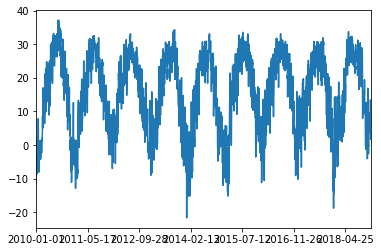

In [27]:
GFS_TMAX = daily_gfs['TMAX']['2010-01-01 12:00:00':'2018-12-30 12:00:00']  # select 2010-01-01 to 2018-12-30
GFS_TMAX.index = GFS_TMAX.index.strftime('%Y-%m-%d')  # to be consistent with observation index
# GFS_TMAX.index = GFS_TMAX.index.map(lambda x: x.strftime('%Y-%m-%d'))  # to be consistent with observation index
print(GFS_TMAX)
GFS_TMAX.plot()

Date
2010-01-02     6.0
2010-01-03    10.0
2010-01-04    11.0
2010-01-05    10.0
2010-01-06    18.0
              ... 
2018-12-26    45.0
2018-12-27    54.0
2018-12-28    51.0
2018-12-29    28.0
2018-12-30    36.0
Name: Max Hourly Temp (F), Length: 3261, dtype: float64


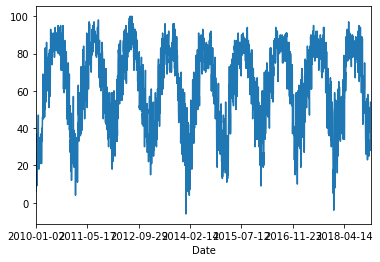

In [28]:
# Select 2010-01-02 to 2018-12-31 (one day after GFS model) and Mask Missing Data
mask_missing = daily_obs['Max Hourly Temp (F)'] == 'M'
OBS_TMAX = daily_obs['Max Hourly Temp (F)'].mask(mask_missing).dropna().astype(float)['2010-01-02':'2018-12-31']
print(OBS_TMAX)
OBS_TMAX.plot()

<b>Find the overlap dates between GFS daily and observation (one day after GFS model)</b> and delete the missing dates.

In [0]:
GFS_TMAX_plus1day = pd.to_datetime(GFS_TMAX.index) + pd.Timedelta('1 day')  # OBS dates are one day after GFS timestamps
mismatch_dates = GFS_TMAX_plus1day.difference(pd.to_datetime(OBS_TMAX.index))  # OBS doesn't have these dates
OBS_TMAX_dates = GFS_TMAX_plus1day.drop(mismatch_dates)  # dates derived from available GFS dates and OBS dates
GFS_TMAX_dates = OBS_TMAX_dates - pd.Timedelta('1 day')

<b>Update the dates in both GFS and obs TMAX</b>

In [66]:
GFS_TMAX[GFS_TMAX_dates.strftime('%Y-%m-%d')]
OBS_TMAX[OBS_TMAX_dates.strftime('%Y-%m-%d')]

2010-01-02     6.0
2010-01-03    10.0
2010-01-04    11.0
2010-01-05    10.0
2010-01-06    18.0
              ... 
2018-12-26    45.0
2018-12-27    54.0
2018-12-28    51.0
2018-12-29    28.0
2018-12-30    36.0
Name: Max Hourly Temp (F), Length: 3225, dtype: float64

<b>????????</b>

In [59]:
# It seems the timestamps are not initialization time??
# if they are not initialization time, then they should be the same as OBS
sfc_gfs.index = pd.to_datetime(sfc_gfs.index, format='%Y-%m-%d %H:%M:%S')
GFS_sfc_TMPC_daily = sfc_gfs['TMPC'].astype(float).resample('24H',base=6).mean()['2010-01-02 06:00:00':'2018-12-31 06:00:00'].resample('D').mean()
GFS_sfc_TMPC_daily

2010-01-02   -14.122500
2010-01-03   -13.993333
2010-01-04   -12.604444
2010-01-05   -11.037778
2010-01-06    -9.748889
                ...    
2018-12-27     8.517778
2018-12-28     5.617778
2018-12-29    -0.748889
2018-12-30    -0.393333
2018-12-31     2.951111
Freq: D, Name: TMPC, Length: 3286, dtype: float64

In [60]:
mismatch_dates = pd.to_datetime(GFS_sfc_TMPC_daily.index).difference(pd.to_datetime(OBS_TMAX_dates))  # OBS_TMAX_dates doesn't have these dates
GFS_sfc_TMPC = GFS_sfc_TMPC_daily.drop(mismatch_dates)
GFS_sfc_TMPC

2010-01-02   -14.122500
2010-01-03   -13.993333
2010-01-04   -12.604444
2010-01-05   -11.037778
2010-01-06    -9.748889
                ...    
2018-12-26     3.484444
2018-12-27     8.517778
2018-12-28     5.617778
2018-12-29    -0.748889
2018-12-30    -0.393333
Name: TMPC, Length: 3225, dtype: float64

## TMIN

### <b>Plot</b> the TMIN from GFS and observation

2010-01-01   -16.46
2010-01-02   -15.96
2010-01-03   -14.36
2010-01-04   -12.86
2010-01-05   -11.06
              ...  
2018-12-26     5.04
2018-12-27     0.04
2018-12-28    -2.66
2018-12-29    -3.16
2018-12-30     1.54
Name: TMIN, Length: 3249, dtype: float64


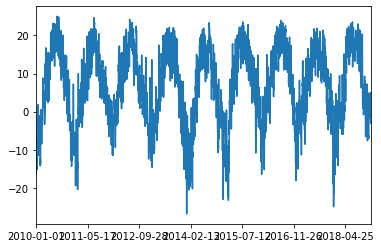

In [62]:
GFS_TMIN = daily_gfs['TMIN']['2010-01-01 12:00:00':'2018-12-30 12:00:00']  # select 2010-01-01 to 2018-12-30
GFS_TMIN.index = GFS_TMIN.index.strftime('%Y-%m-%d')  # to be consistent with observation index
print(GFS_TMIN)
GFS_TMIN.plot()

Date
2010-01-02    -5.0
2010-01-03    -6.0
2010-01-04    -2.0
2010-01-05    -1.0
2010-01-06    -3.0
              ... 
2018-12-26    24.0
2018-12-27    39.0
2018-12-28    28.0
2018-12-29    23.0
2018-12-30    18.0
Name: Min Hourly Temp (F), Length: 3261, dtype: float64


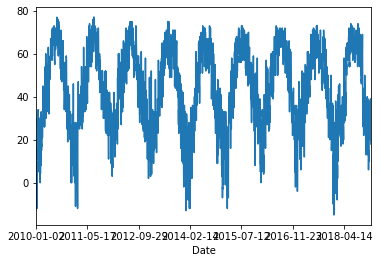

In [63]:
# Select 2010-01-02 to 2018-12-31 (one day after GFS model) and Mask Missing Data
mask_missing = daily_obs['Min Hourly Temp (F)'] == 'M'
OBS_TMIN = daily_obs['Min Hourly Temp (F)'].mask(mask_missing).dropna().astype(float)['2010-01-02':'2018-12-31']
print(OBS_TMIN)
OBS_TMIN.plot()

<b>Find the overlap dates between GFS daily and observation (one day after GFS model)</b> and delete the missing dates.

In [0]:
GFS_TMIN_plus1day = pd.to_datetime(GFS_TMIN.index) + pd.Timedelta('1 day')  # OBS dates are one day after GFS timestamps
mismatch_dates = GFS_TMIN_plus1day.difference(pd.to_datetime(OBS_TMIN.index))  # OBS doesn't have these dates
OBS_TMIN_dates = GFS_TMIN_plus1day.drop(mismatch_dates)  # dates derived from available GFS dates and OBS dates
GFS_TMIN_dates = OBS_TMIN_dates - pd.Timedelta('1 day')

<b>Update the dates in both GFS and obs TMAX</b>

In [67]:
GFS_TMIN[GFS_TMIN_dates.strftime('%Y-%m-%d')]
OBS_TMIN[OBS_TMIN_dates.strftime('%Y-%m-%d')]

2010-01-02    -5.0
2010-01-03    -6.0
2010-01-04    -2.0
2010-01-05    -1.0
2010-01-06    -3.0
              ... 
2018-12-26    24.0
2018-12-27    39.0
2018-12-28    28.0
2018-12-29    23.0
2018-12-30    18.0
Name: Min Hourly Temp (F), Length: 3225, dtype: float64

# Linear regression model


## TMAX

Model slope:     [ 1.17167802 -0.12943634]
Model intercept: 0.0


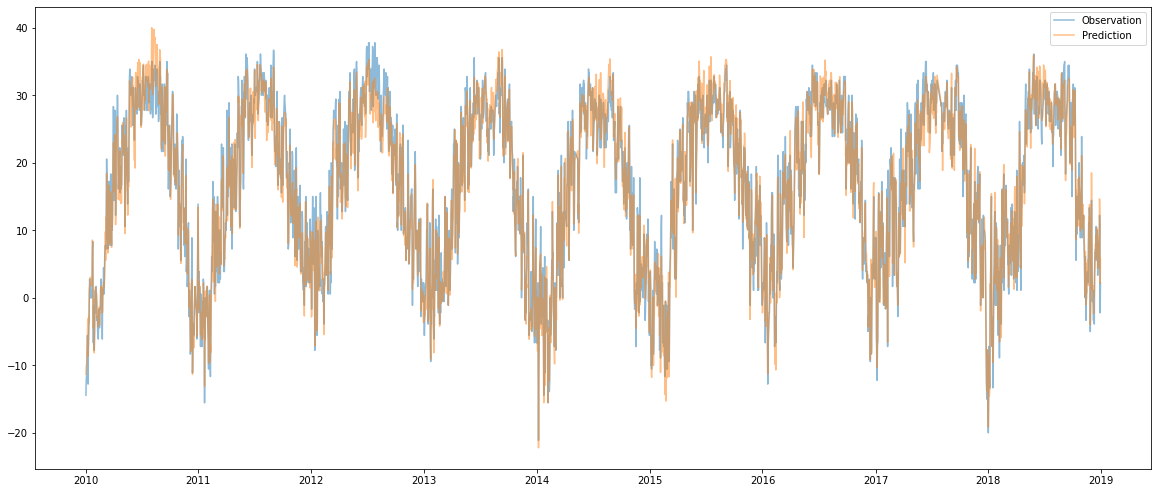

In [86]:
X = np.column_stack((GFS_TMAX[GFS_TMAX_dates.strftime('%Y-%m-%d')].values, GFS_sfc_TMPC.values))  # GFS model daily and sfc TMPC
y = (OBS_TMAX[OBS_TMAX_dates.strftime('%Y-%m-%d')].values-32)*5/9  # Observation, converted from F to C
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_predict = model.predict(X)  # linear regression model prediction

print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)
# y_predict = X[:, 0] * model.coef_[0] + X[:, 1] * model.coef_[1] + model.intercept_  # another form to write the equation

plt.figure(figsize=(20, 8.5))
# plt.plot(OBS_TMAX_dates, X, alpha=0.5)
plt.plot(OBS_TMAX_dates, y, alpha=0.5, label='Observation')
plt.plot(OBS_TMAX_dates, y_predict, alpha=0.5, label='Prediction')
plt.legend()
plt.show()

## TMIN

Model slope:     [ 1.17701816 -0.13946251]
Model intercept: 0.0


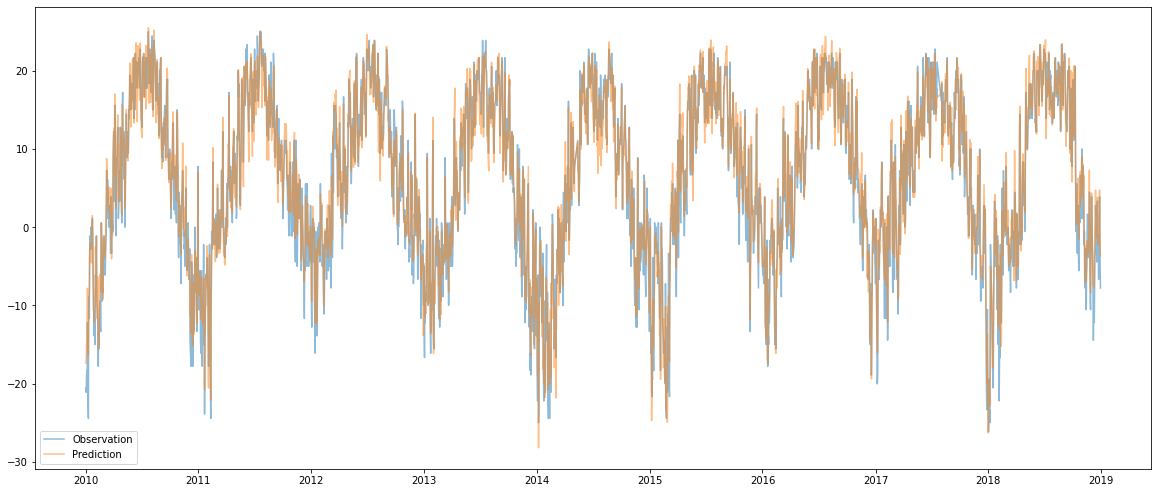

In [87]:
X = np.column_stack((GFS_TMIN[GFS_TMIN_dates.strftime('%Y-%m-%d')].values, GFS_sfc_TMPC.values))  # GFS model daily and sfc TMPC
y = (OBS_TMIN[OBS_TMIN_dates.strftime('%Y-%m-%d')].values-32)*5/9  # Observation, converted from F to C

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_predict = model.predict(X)  # linear regression model prediction

print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)
# y_predict = X[:, 0] * model.coef_[0] + X[:, 1] * model.coef_[1] + model.intercept_  # another form to write the equation

plt.figure(figsize=(20, 8.5))
# plt.plot(OBS_TMIN_dates, X, alpha=0.5)
plt.plot(OBS_TMIN_dates, y, alpha=0.5, label='Observation')
plt.plot(OBS_TMIN_dates, y_predict, alpha=0.5, label='Prediction')
plt.legend()
plt.show()